# Retirement plan - Airbnb in Rio

## The goal of this project is to solidify an investment back at home in Rio
## to prepare for my retirement.

#### One of the most efficient ways to do it is through the purchase of a property in Rio to Airbnb.


#### To accomplish it, I imported Airbnb data sets available at insideairbnb.com. 

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import csv

listings_file = 'listings.csv'
listings_review_file = 'reviews.csv'

#### Then, I started the analysis by cleaning the data, selecting only the data points that are relevant to my investigation. 

In [2]:
rio = pd.read_csv(listings_file)

columns = ['id',
           'host_id',
           'host_name',
           'neighbourhood',
           'room_type',
           'price',
           'number_of_reviews',
           'reviews_per_month',
           'calculated_host_listings_count',
           'availability_365']
           
rio = pd.read_csv(listings_file, usecols=columns)
rio.head()


,id,host_id,host_name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,68997,Matthias,Copacabana,Entire home/apt,190,252,2.07,1,184
1,21280,81163,Jules,Ipanema,Entire home/apt,421,94,1.20,1,64
2,25026,102840,Viviane,Copacabana,Entire home/apt,158,238,1.93,3,180
3,31560,135635,Renata,Ipanema,Entire home/apt,342,282,2.31,1,0
4,35636,153232,Patricia,Ipanema,Entire home/apt,463,181,2.20,1,203


#### Also, I replaced Null values with zeros, listings where price and availability cells were equal to zero, to make the data more structured and pleasant to the eye. 

In [3]:
# replacing Null values with Zero
rio.fillna(0, inplace=True)

# excluding listings with "0" for price and 'availability_365'
rio = rio[rio.price > 0]
rio = rio[rio.availability_365 > 0]

rio[0:11]

,id,host_id,host_name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,68997,Matthias,Copacabana,Entire home/apt,190,252,2.07,1,184
1,21280,81163,Jules,Ipanema,Entire home/apt,421,94,1.20,1,64
2,25026,102840,Viviane,Copacabana,Entire home/apt,158,238,1.93,3,180
4,35636,153232,Patricia,Ipanema,Entire home/apt,463,181,2.20,1,203
5,35764,153691,Patricia Miranda & Paulo,Copacabana,Entire home/apt,132,332,2.78,1,97
6,48305,70933,Alex,Ipanema,Entire home/apt,4227,75,0.66,5,342
7,48726,221941,Vana,Copacabana,Private room,100,42,1.27,1,90
8,48901,222884,Marcio,Copacabana,Entire home/apt,548,4,0.07,1,354
9,49179,224192,David,Copacabana,Entire home/apt,263,83,0.89,38,270
10,50294,70933,Alex,Ipanema,Entire home/apt,1211,72,0.66,5,334


### From that point on, the goal was to find the most popular spots to host. I started by checking the frequency of listings in Rio separated by neighborhood

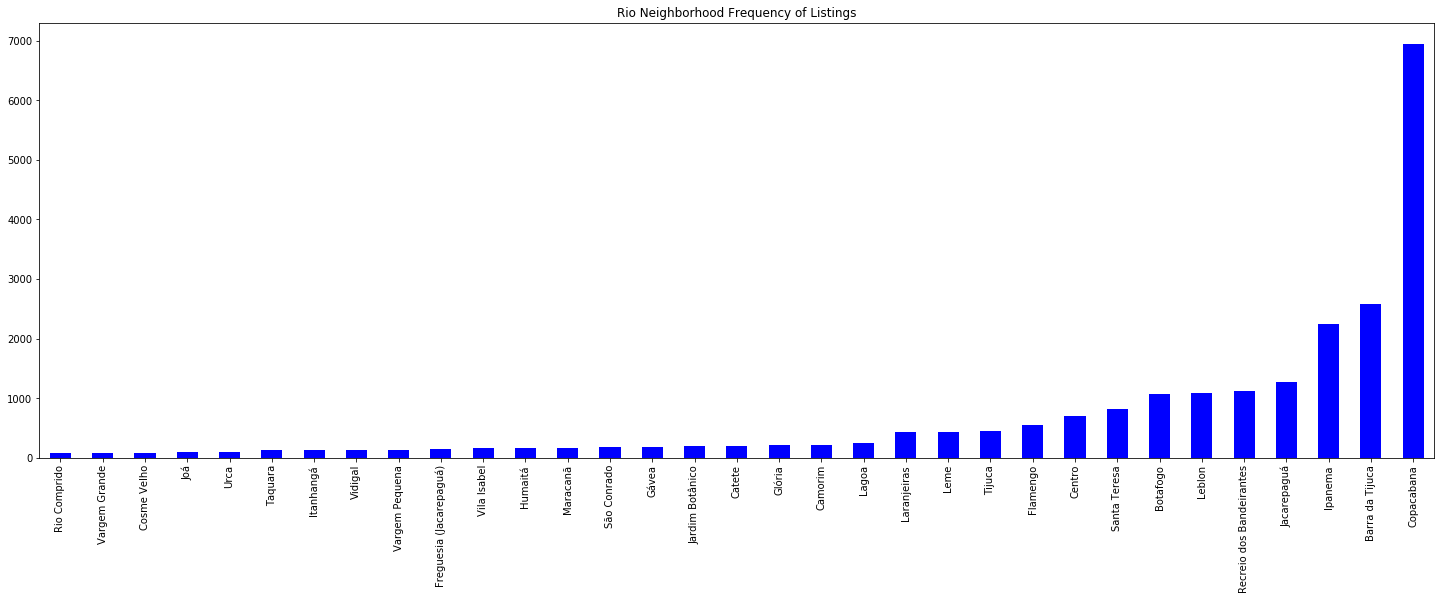

In [4]:
from collections import Counter
n = Counter(rio['neighbourhood'])
n_df = pd.DataFrame.from_dict(n, orient='index').sort_values(by=0)
n_df.iloc[120:].plot(kind='bar', 
           color = 'Blue',
           figsize =(25,8), 
           title = 'Rio Neighborhood Frequency of Listings', 
           legend = False)


### Through analyzing the frequency of listings per neighborhood, I found out that Copacabana, Barra da Tijuca, and Ipanema are the neighborhoods with the most listings.

### Also, I checked the average price for a room in Rio, converting it to USD. The average price is 129 dollars.

In [5]:
#Rio's currency (BRL) is worth 5x less than USD.

rio['price'] /= 5

average_price = sum(rio.price) / float(len(rio.price))
average_price

129.32053849942253

### However, knowing the most popular spots to host and the average price doesn't mean that I have found my perfect match.

In [6]:
#For someone used to NYC prices, $129 is actually not that bad.
#I would like to find a neigborhood where average prices are between $175 and $200. 
#In order to get there, let's find out the average prices for each neighborhood in Rio.

# First, we extract the names of the neighborhoods
neighborhood_names = list(n.keys())

# Then we create a table with names and prices
n_prices = rio[['neighbourhood', 'price']]
n_prices.columns = ['neighbourhood', 'price']

# we pick out the rows which have neighborhood names
n_prices = n_prices[n_prices['neighbourhood'].isin(neighborhood_names)]

# group by neighbourhood and then aggreate the prices based on mean
n_prices_group = n_prices.groupby('neighbourhood')
n_prices = n_prices_group['price'].agg(np.mean)

# turn dictionary's keys and values into a table for easy read
n_prices = n_prices.reset_index()
n_prices['number of listings'] = n.values()

n_prices

,neighbourhood,price,number of listings
0,Abolição,94.450000,6953
1,Alto da Boa Vista,375.395122,2247
2,Anchieta,64.933333,2572
3,Andaraí,227.368000,547
4,Anil,75.068421,185
...,...,...,...
148,Vila Militar,221.533333,1
149,Vila Valqueire,66.450000,1
150,Vila da Penha,31.018182,1
151,Vista Alegre,16.400000,1


### To narrow down my options, I created a second bar chart to show the neighborhoods that most offer rooms at a 200 dollars rate.

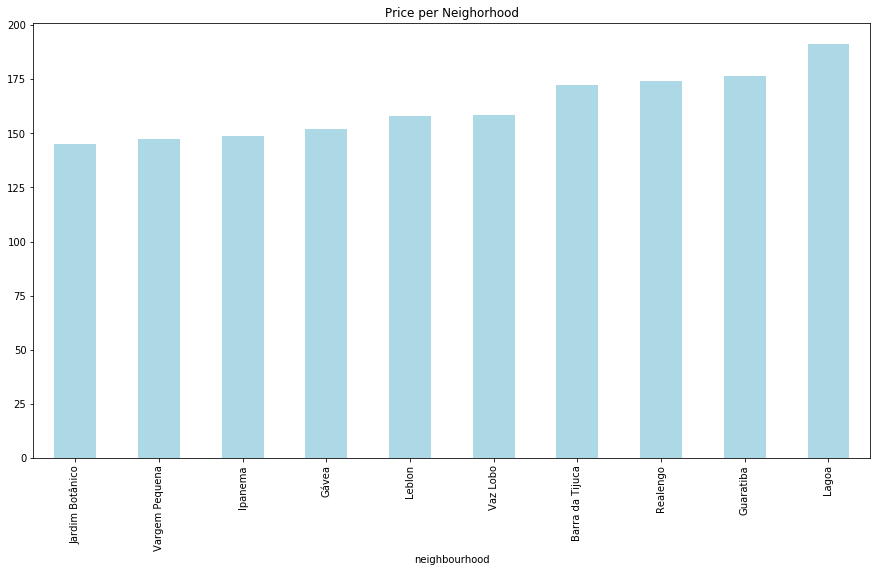

In [7]:
p = n_prices.sort_values(by = 'price')
p.iloc[130:140].plot(x = "neighbourhood",
       y = "price",
       kind='bar', 
       color = 'LightBlue', 
       figsize =(15,8), 
       title = 'Price per Neighorhood', 
       legend = False)

### The second chart gave me Lagoa as the neighborhood with the most 200 dollars listings.

### A histogram gave me extra peace of mind, as I was able to see that other neighborhoods offer, on average, rooms at similar rates, just in case properties in Lagoa are not available for purchase.

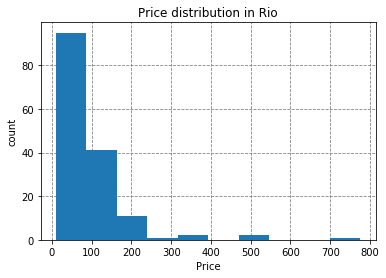

In [8]:
fig, ax = plt.subplots()
ax.hist(n_prices.price)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('Price')
ax.set_ylabel('count')
plt.title('Price distribution in Rio')
plt.show()

### By curiosity, I created a pie chart to see the room type distribution in Rio... 

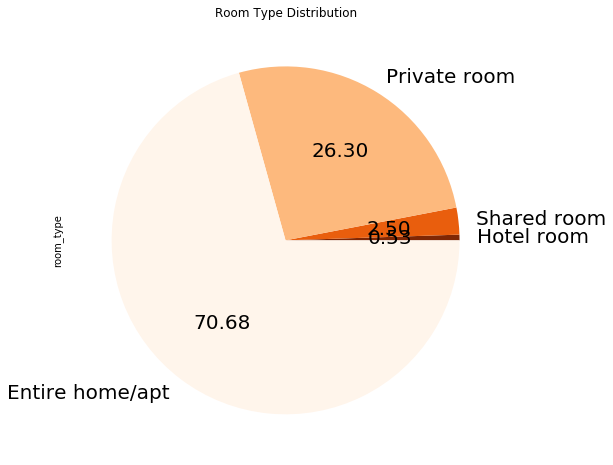

In [9]:
room = rio.room_type
r = Counter(room)

room_rio = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_rio.columns = ['room_type']
room_rio.plot.pie(y = 'room_type', 
                 colormap = 'Oranges_r', 
                 figsize=(8,8), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

### ...and a scatterplot to see the relationship between reviews and price.

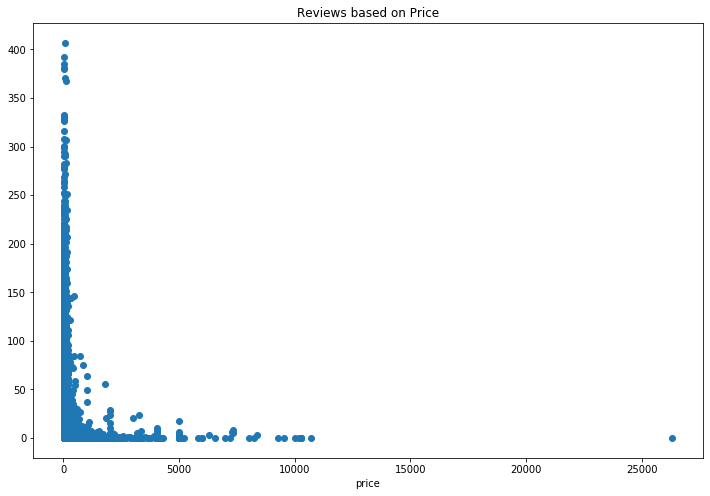

In [10]:
price_review = rio[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

### Before starting to reach out to hosts in Lagoa, I decided to narrow down the ones with the most reviews during Carnival, a Brazilian festival traditionally held every February.

### Firstly, I combined my listing data set with a review data set, also available at insideairbnb.com. The second contains the dates that those listings where booked.

In [11]:
review = pd.read_csv(listings_review_file)

review['id'] = review['listing_id']
df3 = pd.merge(rio, review, how='left', on='id')

print(df3)

              id    host_id  host_name             neighbourhood  \
0          17878      68997   Matthias                Copacabana   
1          17878      68997   Matthias                Copacabana   
2          17878      68997   Matthias                Copacabana   
3          17878      68997   Matthias                Copacabana   
4          17878      68997   Matthias                Copacabana   
...          ...        ...        ...                       ...   
298022  44337570   91654021     Daniel                    Leblon   
298023  44337678  357540576   Bernardo                Copacabana   
298024  44338103  357651021  Ana Luiza   Freguesia (Jacarepaguá)   
298025  44338273  155224911    Tatiana                Copacabana   
298026  44338764  357699633  Jackeline  Recreio dos Bandeirantes   

              room_type  price  number_of_reviews  reviews_per_month  \
0       Entire home/apt   38.0                252               2.07   
1       Entire home/apt   38.0         

### Later, I filtered the data to show me only the listings located in Lagoa, which costs between 175 and 200 dollars, and which received at least eight reviews.

In [12]:
popular_hosts = df3[(df3.neighbourhood == 'Lagoa') & (df3.price <= 200) & (df3.price >= 175) & (df3.number_of_reviews >= 8)]

print(popular_hosts['date'])



110449    2016-01-03
110450    2016-01-20
110451    2016-02-11
110452    2016-07-31
110453    2016-08-15
110454    2017-02-05
110455    2017-03-02
110456    2017-07-30
110457    2018-01-03
110458    2019-01-02
118797    2015-09-28
118798    2016-02-09
118799    2016-08-21
118800    2017-03-01
118801    2017-11-21
118802    2017-11-27
118803    2018-02-16
118804    2018-04-02
148139    2016-02-10
148140    2016-03-27
148141    2016-04-11
148142    2016-07-23
148143    2016-08-08
148144    2017-01-02
148145    2017-03-01
148146    2017-04-02
148147    2017-09-11
148148    2018-01-01
148149    2018-07-05
148150    2018-08-26
148151    2019-01-01
148152    2019-03-05
148153    2019-10-06
148154    2020-01-01
148155    2020-02-26
Name: date, dtype: object


### Lastly, after updated the date column from string to date, using import datetime, I printed the list with the name of three hosts - Paula, Regina, and Luiz Andre - as well as their id numbers.

In [13]:
import datetime

popular_hosts["date"] = pd.to_datetime(popular_hosts["date"])                                         
carnival = popular_hosts[pd.to_datetime(popular_hosts.loc[:,'date']).dt.month == 2]

print(carnival[['host_id', 'host_name', 'price', 'number_of_reviews', 'neighbourhood', 'date']])


         host_id   host_name  price  number_of_reviews neighbourhood  \
110451  21139427       Paula  199.6                 10         Lagoa   
110454  21139427       Paula  199.6                 10         Lagoa   
118798  19161707      Regina  185.2                  8         Lagoa   
118803  19161707      Regina  185.2                  8         Lagoa   
148139  56705432  Luiz André  199.6                 17         Lagoa   
148155  56705432  Luiz André  199.6                 17         Lagoa   

             date  
110451 2016-02-11  
110454 2017-02-05  
118798 2016-02-09  
118803 2018-02-16  
148139 2016-02-10  
148155 2020-02-26  


/Users/danisouza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### With that data, I can go to the app and look for their contact information and hopefully get some insights into how does it take to host a property that is very similar to the one I plan on purchasing soon.

### Thanks for reading!